## Air Network - Positive Only

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import bct as bct
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Prepare the network for analysis.

Load the withdrawal correlation matrix.

In [2]:
air_df = pd.read_csv('../../data/cFosCAN_alcohol_air_orig_20180326.csv')

Set the index to the region labels.

In [3]:
air_df = air_df.set_index('Unnamed: 0')

Sort regions alphabetically.

In [4]:
air_df = air_df.sort_index()
air_df = air_df.sort_index(axis=1)

In [5]:
air_mat = air_df.as_matrix()

Zero-out the diagonal and negative edges, then save the matrix for analysis in MATLAB.

In [6]:
np.fill_diagonal(air_mat, 0)

In [7]:
air_mat_po = air_mat.copy()

In [8]:
air_mat_po[air_mat_po < 0] = 0

In [9]:
np.savetxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_air_mat_po_20180526.csv', air_mat_po)

Plotting functions do not play nice with negative edges or dense graphs, so we remove those when laying out the plot.

In [10]:
air_mat_r80 = air_mat.copy()

In [11]:
air_mat_r80[air_mat_r80 < 0.80] = 0

In [12]:
G_r80 = nx.from_numpy_matrix(air_mat_r80)

#### Centrality (node strength)

In [14]:
node_strength = bct.degree.strengths_und(air_mat_po)

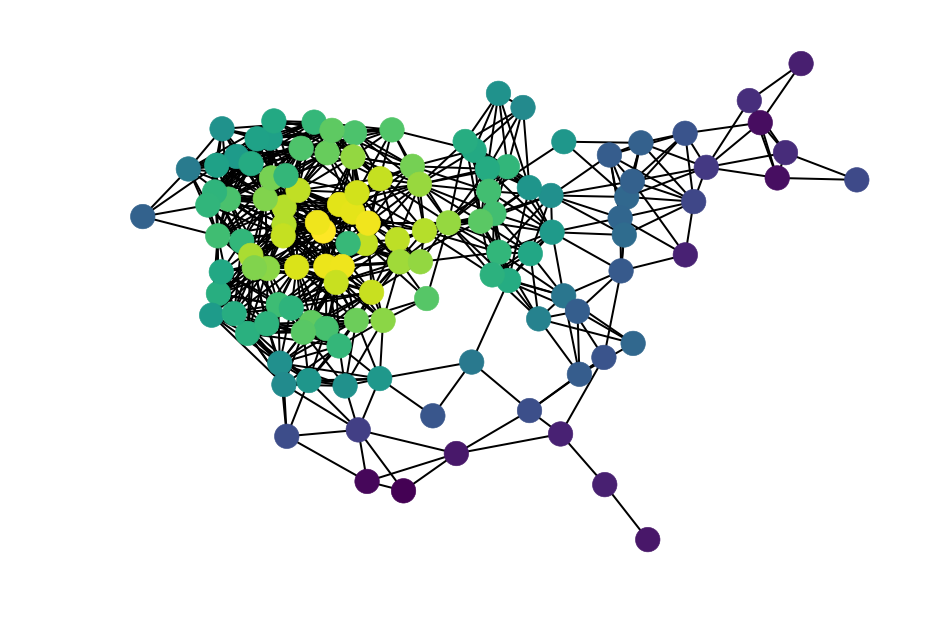

In [15]:
nx.draw_kamada_kawai(G_r80, node_color=node_strength, node_size=150, cmap=plt.cm.viridis)

### Resolution Parameter = 1.0
These were calculated using the `run_louvain_po.m` Matlab script and gamma=1.0.

In [16]:
reordered_matrix = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.0_ReorderedMatrix.txt')

In [18]:
reordered_matrix = reordered_matrix.reshape(air_mat.shape)

In [19]:
partition = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.0_GraphPartition.txt')

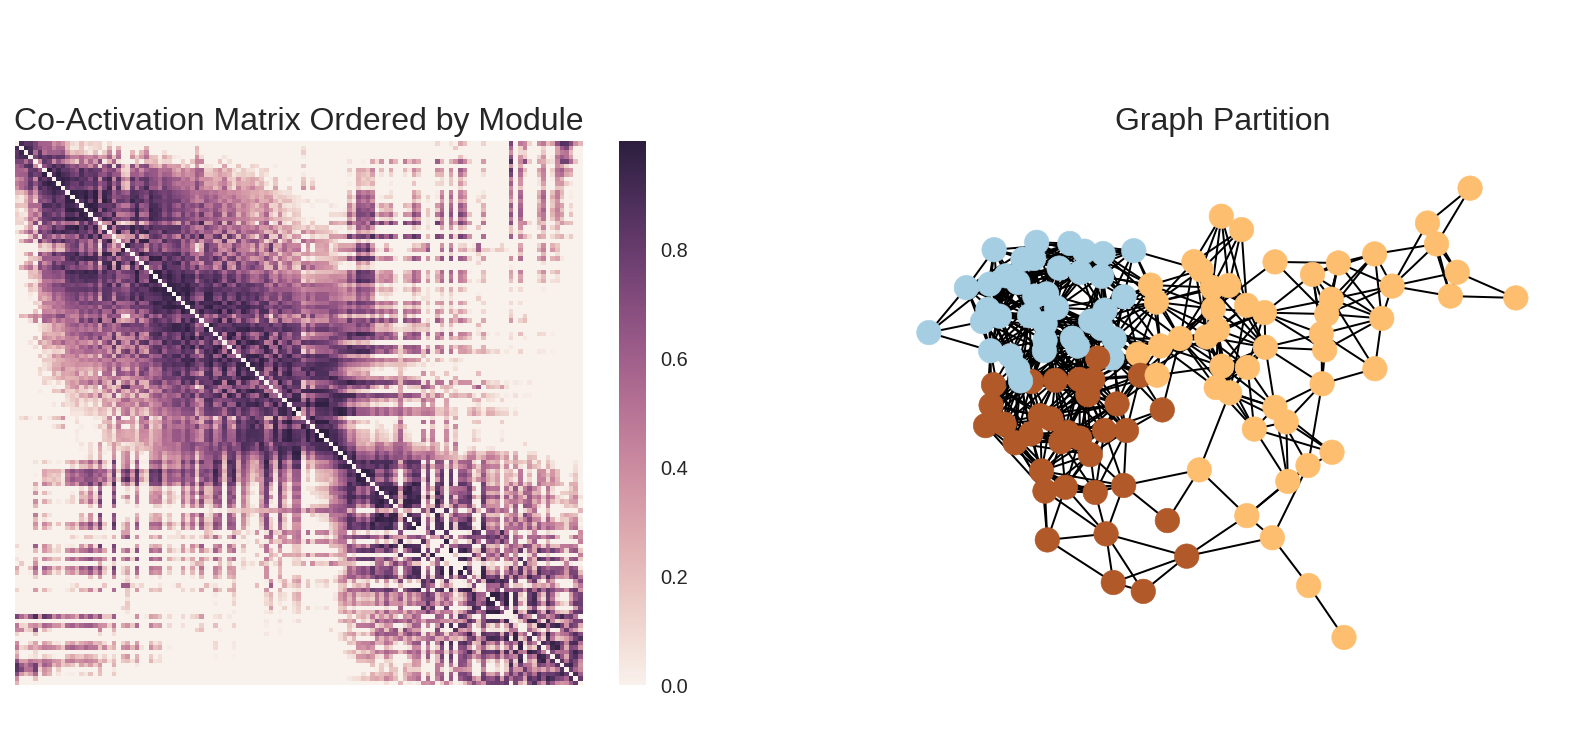

In [20]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = sns.heatmap(reordered_matrix, xticklabels=False, yticklabels=False, ax=ax[0], )
g = nx.draw_kamada_kawai(G_r80, node_color=partition, node_size=150, cmap=plt.cm.Paired, ax=ax[1])
g = ax[0].set_title('Co-Activation Matrix Ordered by Module', fontsize=16)
g = ax[1].set_title('Graph Partition', fontsize=16)

### Within-Module Degree (z-scored)

In [21]:
wmdz = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.0_WMDz.txt')

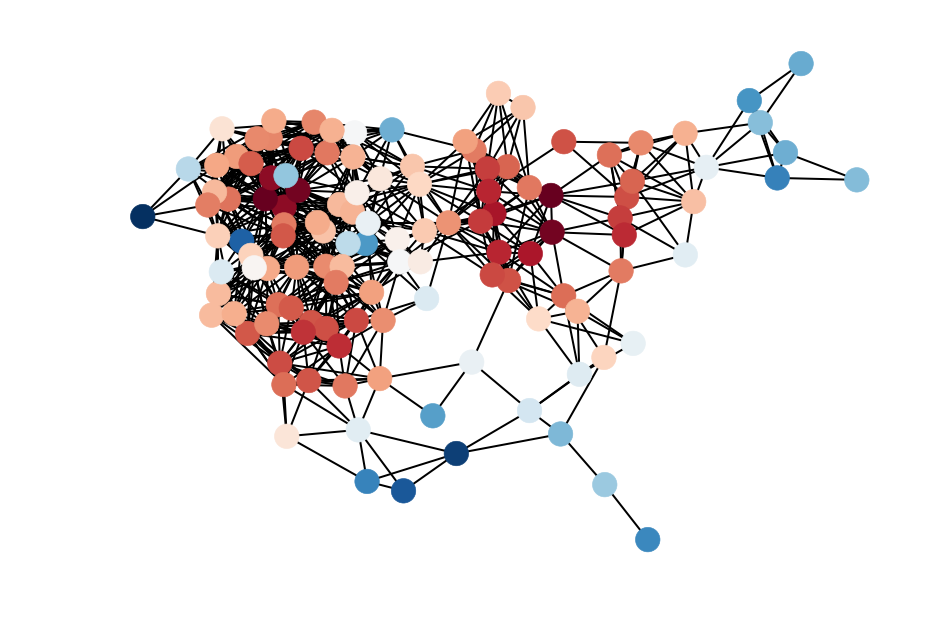

In [22]:
nx.draw_kamada_kawai(G_r80, node_color=wmdz, node_size=150, cmap=plt.cm.RdBu_r)

### Participation Coefficient

In [23]:
pc = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.0_PC.txt')

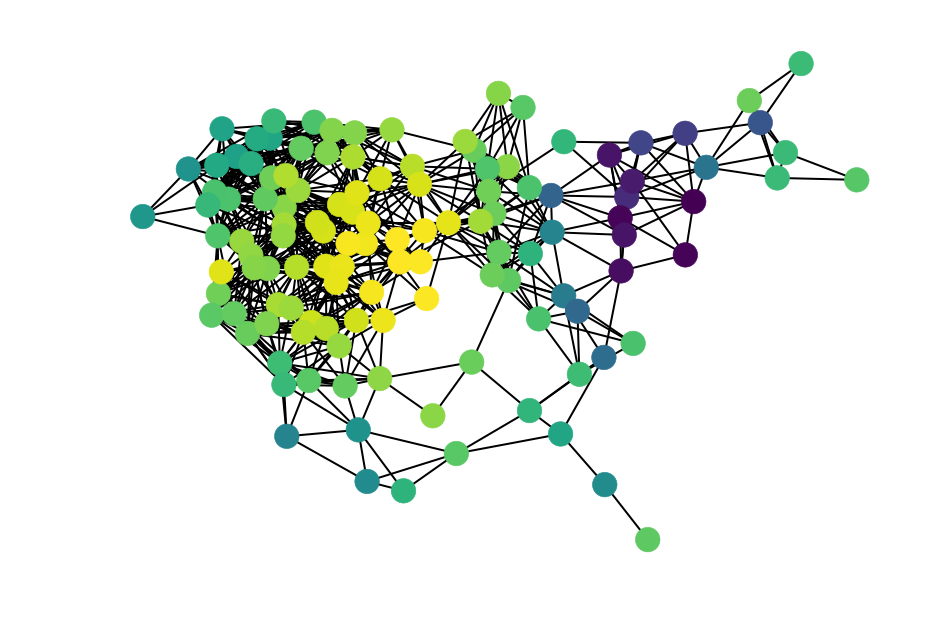

In [24]:
nx.draw_kamada_kawai(G_r80, node_color=pc, node_size=150, cmap=plt.cm.viridis)

Combine all our results into a single spreadsheet.

In [25]:
combined_df = pd.DataFrame(np.array([node_strength, partition, pc, wmdz]).T,
                           columns=['centrality', 'partition', 'pc', 'wmdz'])

In [26]:
combined_df = combined_df.set_index(air_df.index)

In [27]:
combined_df.index.names = ['Region']

Save the combined spreadsheet to disk.

In [28]:
combined_df.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.0_combined_results.csv', sep=',')

### Resolution Parameter = 1.1
These were calculated using the `run_louvain_po.m` Matlab script and gamma=1.1.

In [29]:
reordered_matrix = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.1_ReorderedMatrix.txt')

In [30]:
reordered_matrix = reordered_matrix.reshape(air_mat.shape)

In [31]:
partition = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.1_GraphPartition.txt')

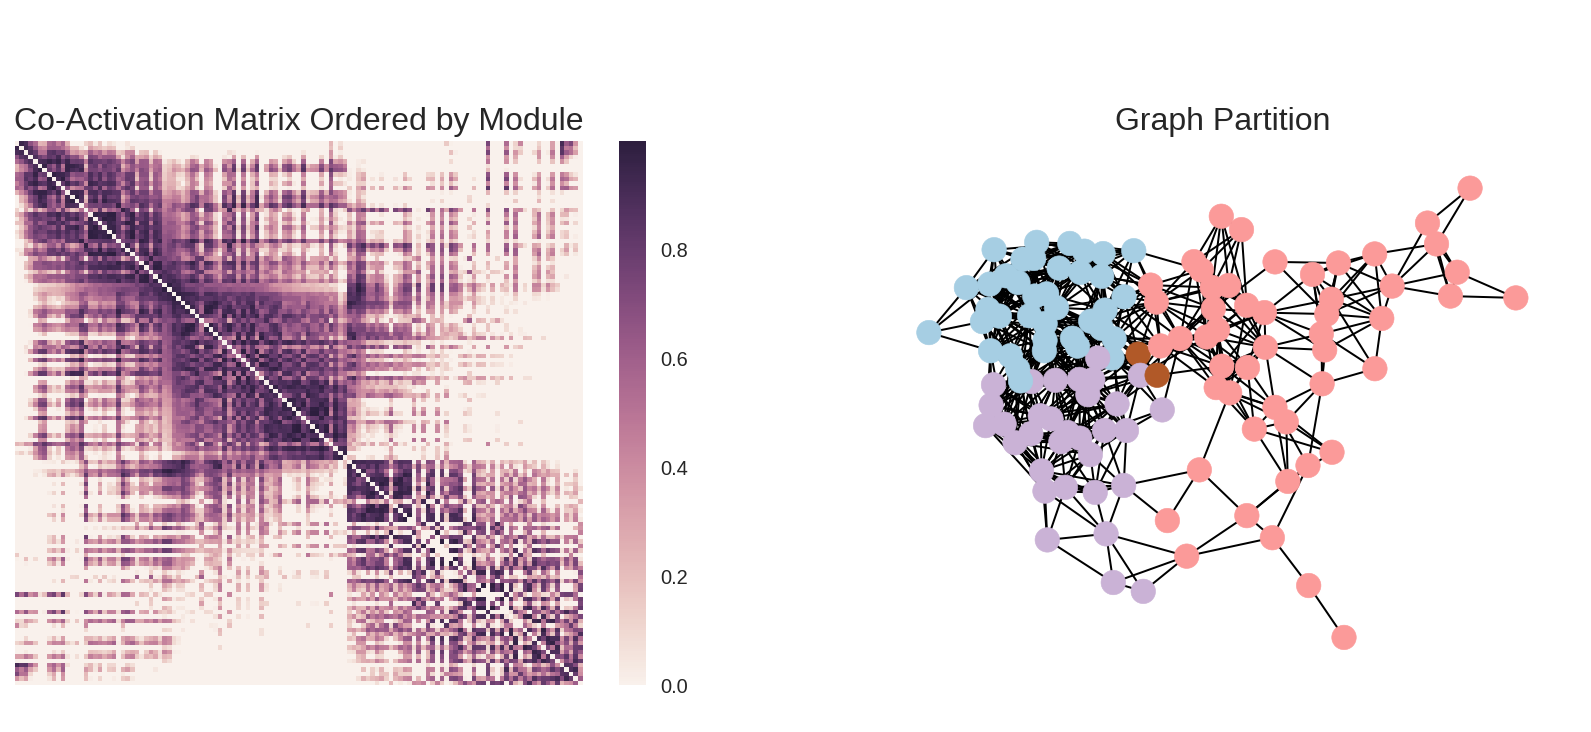

In [32]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = sns.heatmap(reordered_matrix, xticklabels=False, yticklabels=False, ax=ax[0], )
g = nx.draw_kamada_kawai(G_r80, node_color=partition, node_size=150, cmap=plt.cm.Paired, ax=ax[1])
g = ax[0].set_title('Co-Activation Matrix Ordered by Module', fontsize=16)
g = ax[1].set_title('Graph Partition', fontsize=16)

### Within-Module Degree (z-scored)

In [33]:
wmdz = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.1_WMDz.txt')

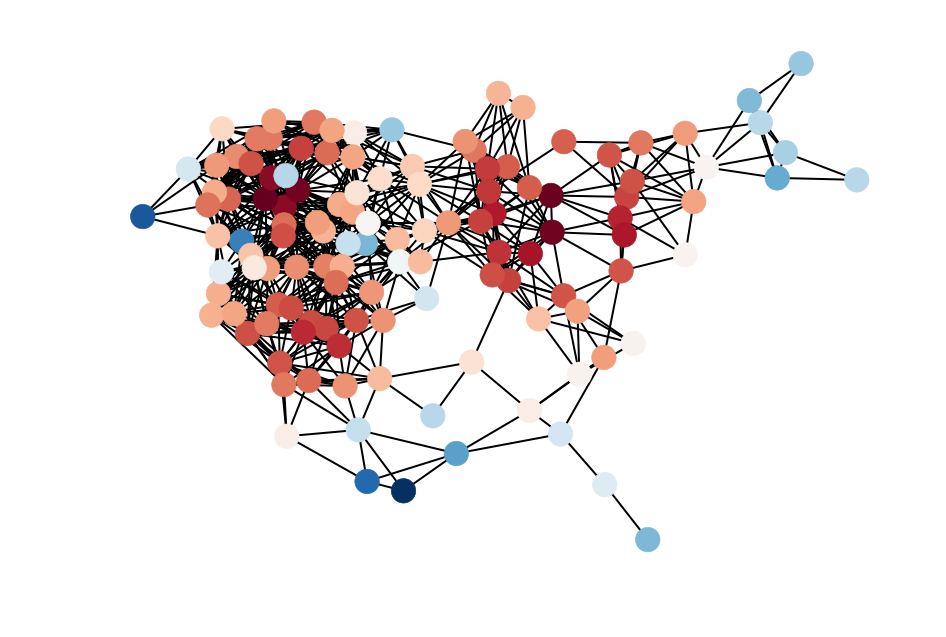

In [34]:
nx.draw_kamada_kawai(G_r80, node_color=wmdz, node_size=150, cmap=plt.cm.RdBu_r)

### Participation Coefficient

In [35]:
pc = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.1_PC.txt')

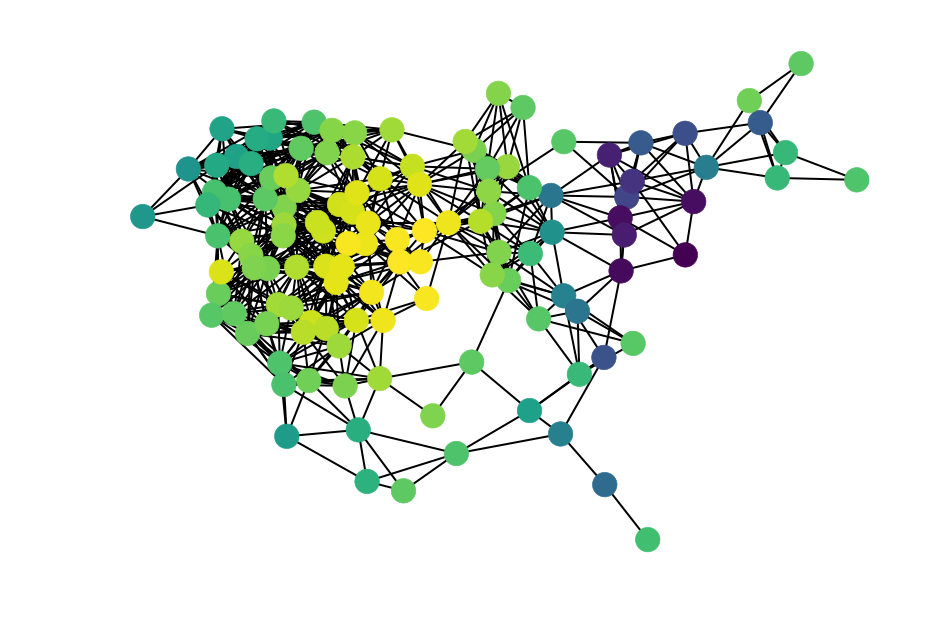

In [36]:
nx.draw_kamada_kawai(G_r80, node_color=pc, node_size=150, cmap=plt.cm.viridis)

Combine all our results into a single spreadsheet.

In [37]:
combined_df = pd.DataFrame(np.array([node_strength, partition, pc, wmdz]).T,
                           columns=['centrality', 'partition', 'pc', 'wmdz'])

In [38]:
combined_df = combined_df.set_index(air_df.index)

In [39]:
combined_df.index.names = ['Region']

Save the combined spreadsheet to disk.

In [40]:
combined_df.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/results/air_po/gamma1.1_combined_results.csv', sep=',')